In [101]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

In [102]:
datafile = '/content/drive/MyDrive/ml-data/face-images/faces.mat'
mat = scipy.io.loadmat( datafile )
X = mat['X']
print(X.shape)

(5000, 1024)


In [103]:
def featureNormalize(X):
    for i in range(X.shape[1]):
        line = X[:,i]
        u, s = np.mean(line), np.std(line)
        X[:, i] = (X[:, i] - u) / s
    return X
  
def getCovariance(X):
    return (1 / X.shape[0])* (X.T.dot(X))

In [104]:
def data2Image(x):
    width, height = 32, 32
    return x.reshape((32, 32))

def displayData(X, nrows=32, ncols=32, isRandom=False):
    w, h = 32, 32
    if isRandom == True:
        indicesDisplayed = random.sample(  range(X.shape[0]), nrows * ncols  )
    else:
        indicesDisplayed = np.arange(nrows * ncols)
    bigPicture = np.zeros((h * nrows, w * ncols))
    indexForData = 0
    for i in range(nrows):
        for j in range(ncols):
            bigPicture[i*w : (i+1)*w, j*h : (j+1)*h] = data2Image(X[indicesDisplayed[indexForData]]).T
            indexForData += 1
    fig = plt.figure(figsize=(7, 7))
    img = plt.imshow(bigPicture, cmap="gray")

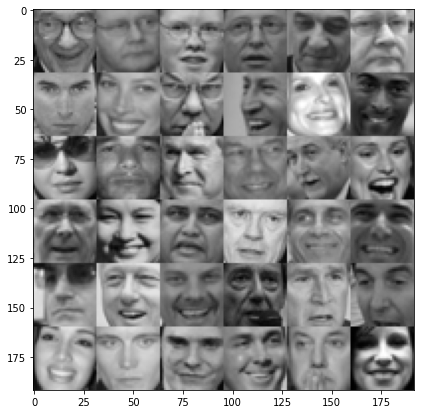

In [105]:
displayData(X, nrows=6, ncols=6)

In [106]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
covX = np.dot(X_scaled.T, X_scaled) / X_scaled.shape[0]

In [107]:
U, sigma, Ut = np.linalg.svd(covX)
U.shape

(1024, 1024)

In [108]:
sigma2, P = np.linalg.eig(covX)
P.shape

(1024, 1024)

In [109]:
U

array([[-0.01425307, -0.03606596, -0.04561884, ...,  0.00521903,
         0.00091143,  0.00077515],
       [-0.01474233, -0.03809858, -0.04756249, ..., -0.01142763,
        -0.00228691, -0.00434598],
       [-0.01501482, -0.03988747, -0.05082085, ...,  0.01843345,
         0.00554132,  0.00873415],
       ...,
       [-0.00895052,  0.03119618, -0.05691806, ...,  0.0011493 ,
         0.00452914, -0.01218846],
       [-0.00769526,  0.0290752 , -0.05579144, ..., -0.00103011,
        -0.00647834,  0.00752741],
       [-0.00692969,  0.02725819, -0.05339471, ...,  0.00266801,
         0.00543461, -0.00218828]])

In [117]:
-P

array([[-0.01425307, -0.03606596,  0.04561884, ...,  0.0119051 ,
         0.00801306, -0.00287396],
       [-0.01474233, -0.03809858,  0.04756249, ..., -0.02425985,
        -0.01406534,  0.02497376],
       [-0.01501482, -0.03988747,  0.05082085, ...,  0.01888212,
         0.02789436, -0.04092791],
       ...,
       [-0.00895052,  0.03119618,  0.05691806, ...,  0.02452582,
        -0.02166304,  0.04032625],
       [-0.00769526,  0.0290752 ,  0.05579144, ..., -0.02099369,
         0.01448294, -0.02590793],
       [-0.00692969,  0.02725819,  0.05339471, ...,  0.0030591 ,
        -0.00671602,  0.00942517]])

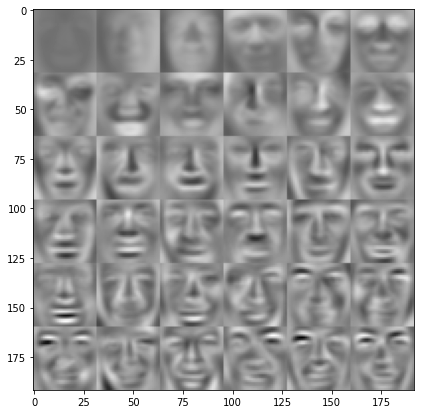

In [111]:
displayData(U[:,:36].T, nrows=6, ncols=6)

In [112]:
k = 20
Z = np.dot(X, U[:,:k])  # (5000, 1024) * (1024, k)
Z.shape

(5000, 20)

In [113]:
X_recovered = np.dot(Z, U[:,:k].T)
X_recovered.shape

(5000, 1024)

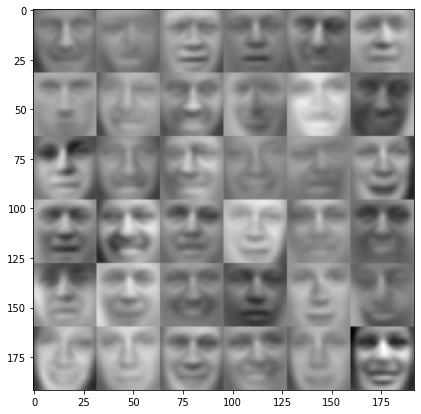

In [114]:
displayData(X_recovered, nrows=6, ncols=6)

In [115]:
np.linalg.inv(U)

array([[-0.01425307, -0.01474233, -0.01501482, ..., -0.00895052,
        -0.00769526, -0.00692969],
       [-0.03606596, -0.03809858, -0.03988747, ...,  0.03119618,
         0.0290752 ,  0.02725819],
       [-0.04561884, -0.04756249, -0.05082085, ..., -0.05691806,
        -0.05579144, -0.05339471],
       ...,
       [ 0.00521903, -0.01142763,  0.01843345, ...,  0.0011493 ,
        -0.00103011,  0.00266801],
       [ 0.00091143, -0.00228691,  0.00554132, ...,  0.00452914,
        -0.00647834,  0.00543461],
       [ 0.00077515, -0.00434598,  0.00873415, ..., -0.01218846,
         0.00752741, -0.00218828]])

In [116]:
U.T

array([[-0.01425307, -0.01474233, -0.01501482, ..., -0.00895052,
        -0.00769526, -0.00692969],
       [-0.03606596, -0.03809858, -0.03988747, ...,  0.03119618,
         0.0290752 ,  0.02725819],
       [-0.04561884, -0.04756249, -0.05082085, ..., -0.05691806,
        -0.05579144, -0.05339471],
       ...,
       [ 0.00521903, -0.01142763,  0.01843345, ...,  0.0011493 ,
        -0.00103011,  0.00266801],
       [ 0.00091143, -0.00228691,  0.00554132, ...,  0.00452914,
        -0.00647834,  0.00543461],
       [ 0.00077515, -0.00434598,  0.00873415, ..., -0.01218846,
         0.00752741, -0.00218828]])